# __Formulación problemas de búsqueda__

La clase abstracta `SearchProblem` servirá como una plantilla general para el proceso de formulación del problema como un problema de búsqueda. Cualquier implementación deberá heredar de esta clase

In [ ]:
class SearchProblem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwds):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal

    def actions(self, node):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        raise NotImplementedError

    def result(self, node, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError

    def is_goal(self, node):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        return self.goal == node

    def action_cost(self, s, a, s1):
        """Return the cost of a solution path that arrives at state s1 from
        state s via action a. If the problem
        is such that the path doesn't matter, this function will only look at
        state s1.  If the path does matter, it will consider state s1
        and action a. The default method costs 1 for every step in the path."""
        return 1# Start writing code here...

También es posible implementar la clase abstracta `Node` para representar los posibles estados del problemas.

In [ ]:
class Node:
    def __init__(self, state='', parent=None, action=None, cost=1):
        self.state = state
        self.parent = parent
        self.action = action
        self.cost = cost

    def states_path(self):
        if self.parent == None:
            return [self]
        return self.parent.states_path() + [self]

    def actions_path(self):
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]

    def __eq__(self, node):
        if node:
            return self.state == node.state
        return False

    def __repr__(self):
        return str(self.state)

# __Ejemplo 1. Un grafo simple__

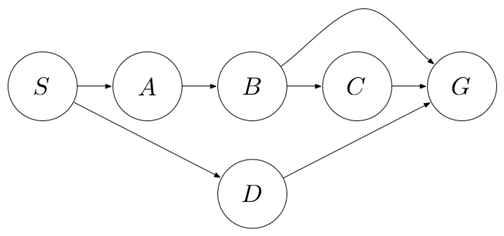

## __1. Formulando el problema__

In [ ]:
class GrafoSimple(SearchProblem):

    def actions(self, node):

        node_actions = {
            'S': ['move-to-D', 'move-to-A'],
            'A': ['move-to-B'],
            'B': ['move-to-C', 'move-to-G'],
            'C': ['move-to-G'],
            'D': ['move-to-G'],
            'G': []
        }
        return node_actions[node.state]

    def result(self, node, action):

        action_result = {
            'move-to-D': 'D',
            'move-to-B': 'B',
            'move-to-G': 'G',
            'move-to-A': 'A',
            'move-to-C': 'C',
        }

        new_state = action_result[action]
        new_node = Node(state=new_state, parent=node, action=action, cost=1)
        return new_node


## __2. Implementando los algoritmos de búsqueda__

Recordemos el modelo general para los algoritmos de búsqueda no informada.



![Picture title](image-20230212-191311.png)

In [ ]:
def expand(node, problem):
  # crear una lista de descedientes llamada childs
  # por cada accion del nodo obtener el resultado y asignarlo al hijo
  # retornar la lista de descendientes
  childs = []
  for action in problem.actions(node):
    childs.append(problem.result(node, action))
  return childs



def BFS(problem, fringe=[]):
  # realizar la implementación del algoritmo BFS
  # utilizar una lista local de los expandidos y modificar la lista del cerco o borde
  closed = []
  fringe.append(problem.initial)
  while True:
    if not fringe:
      return "FAILURE"
    node = fringe.pop(0)
    if problem.is_goal(node):
      return node
    if node not in closed:
      closed.append(node)
      for child in expand(node, problem):
        fringe.append(child)



def DFS(problem, fringe=[]):
  # realizar la implementación del algoritmo BFS
  # utilizar una lista local de los expandidos y modificar la lista del cerco o borde
  closed2=[]
  fringe.append(problem.initial)
  while True:
    if not fringe:
      return "FAILURE"
    # Remove the last element from the fringe list to simulate a stack.
    node = fringe.pop()
    if problem.is_goal(node):
      return node
    if node not in closed2:
      closed2.append(node)
      for child in expand(node, problem):
        fringe.append(child)

In [ ]:
S_o = Node('S')
G = Node('G')

grafo = GrafoSimple(S_o, G)

solution = BFS(grafo)
print(solution.states_path())
print(solution.actions_path())


solution = DFS(grafo)
print(solution.states_path())
print(solution.actions_path())

[S, D, G]
['move-to-D', 'move-to-G']
[S, A, B, G]
['move-to-A', 'move-to-B', 'move-to-G']


## __Rompecabezas de 8-piezas__

 A continuación se presenta la solución al problema del rompecabezas de 8-piezas utilizando los algoritmos de BFS y DFS

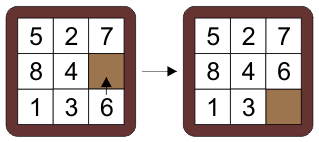

In [1]:
from collections import deque

class Tablero:
    """ Esta clase representa el tablero, de 3x3 como el rompecabezas de 8 piezas.
    Argumentos:
            -estado es mi configuración actual del tablero.
            -padre:  es un atributo que me va a almacenar el nodo o estado anterior en el que me encuentre.
            -accion:  es un atributo y me va a representar la acción que me llevó al estado actual.
        """
    def __init__(self, estado, padre=None, accion=None):
        self.estado = estado
        self.padre = padre
        self.accion = accion

    def __repr__(self):
        #construimos una representación de 3x3
        filas = [self.estado[i:i+3] for i in range(0, 9, 3)]
        representacion = ''

        # recorremos los elementos sobre las filas del tablero y unimos sus elementos con espacios.
        for fila in filas:
            representacion += ' '.join(map(str, fila)) + '\n'

            #me imprime la representacion del tablero con un espacio entre cada matriz 3x3.
        return representacion.strip() + '\n'

In [2]:
from collections import deque

class Problema:
    def __init__(self, estado_inicial, estado_objetivo):
      #defino y creo el tablero con mi problema de configuracion inicial.
        self.estado_inicial = Tablero(estado_inicial)
        self.estado_objetivo = estado_objetivo

    def acciones(self, nodo): # Indented to be part of Problema class
        """Devuelve una lista de posibles movimientos para el nodo actual del tablero."""

        # Encuentro la posición del espacio vacío
        index = nodo.estado.index(0)

        movimientos = []
        num_columnas = 3


        # Coordenadas de la posición del espacio vacío
        fila = index // num_columnas
        columna = index % num_columnas

        # Verifica si se puede mover un lugar a la izquierda
        if columna > 0:
            movimientos.append('izquierda')

        # Verifica si se puede mover un lugar a la derecha
        if columna < num_columnas - 1:
            movimientos.append('derecha')

        # Verifica si se puede mover un lugar arriba
        if fila > 0:
            movimientos.append('arriba')

        # Verifica si se puede mover un lugar abajo
        if fila < num_columnas - 1:
            movimientos.append('abajo')

        return movimientos


    def resultado(self, nodo, accion):
        """Devuelve el nuevo actual  nodo después de aplicar la acción al nodo dado."""
        #necesito una lista "copia" para no afectar rl estado del nodo
        estado = list(nodo.estado)

        # Encuentro la posición del espacio vacío
        index = estado.index(0)

        # Definir el número de columnas
        num_columnas = 3

        movimientos = {
            'izquierda': -1,
            'derecha'  :  1,
            'arriba'   : -3,
            'abajo'    :  3
        }

        nuevo_index = index + movimientos[accion]

        # Intercambio la ficha vacía con la pieza en la nueva posición
        estado[index], estado[nuevo_index] = estado[nuevo_index], estado[index]

        # Crea y devuelve un nodo nuevo con el estado nuevo
        return Tablero(estado=estado, padre=nodo, accion=accion)



  #identifica si mi estado actual es el objetivo
    def es_objetivo(self, nodo):
        """
            Determina si el estado del nodo es el estado objetivo
        """
        # Compara el estado actual con el estado objetivo
        if nodo.estado == self.estado_objetivo:

            # Si coinciden
            return True

        else:

            # Si no coinciden
            return False

In [3]:
def expandir(nodo, problema):
    """Expande un nodo dado para expandir todos sus hijos (ramas)"""
    hijos = []

    #bucle sobre cada accion posible que se pueda hacer en este nodo
    for accion in problema.acciones(nodo):

        hijo = problema.resultado(nodo, accion)
        hijos.append(hijo)

    return hijos

def BFS(problema):
    """Realiza la búsqueda por amplitud (BFS)."""
    frontera = deque([problema.estado_inicial])
    cerrados = set()

    while frontera:
        nodo = frontera.popleft()
        if problema.es_objetivo(nodo):
            return nodo
        if tuple(nodo.estado) not in cerrados:
            cerrados.add(tuple(nodo.estado))
            for hijo in expandir(nodo, problema):
                if tuple(hijo.estado) not in cerrados and hijo not in frontera:
                    frontera.append(hijo)
    return "FAILURE"


def DFS(problema):
    """Realiza la búsqueda por profundidad (DFS)."""
    frontera = [problema.estado_inicial]
    cerrados = set()

    while frontera:
        nodo = frontera.pop()
        if problema.es_objetivo(nodo):
            return nodo
        if tuple(nodo.estado) not in cerrados:
            cerrados.add(tuple(nodo.estado))
            for hijo in expandir(nodo, problema):
                if tuple(hijo.estado) not in cerrados and hijo not in frontera:
                    frontera.append(hijo)
    return "FAILURE"



In [4]:
def estados_camino(nodo):
    """Me devuelve el camino de estados desde el nodo inicial hasta el nodo objetivo."""
    camino = []

    while nodo:

        # Agrega el estado actual al camino
        camino.append(nodo.estado)

        nodo = nodo.padre

    # Invierte el camino para que empiece desde el estado inicial
    camino.reverse()

    return camino



def acciones_camino(nodo):
    """Me devuelve el camino de acciones desde el nodo inicial hasta el nodo objetivo."""

    camino = []

    while nodo and nodo.accion is not None:

        # Agrega la acción actual al camino
        camino.append(nodo.accion)

        nodo = nodo.padre

    # Invierte el camino para que empiece desde el estado inicial
    camino.reverse()
    return camino


In [5]:
def main():

    estado_inicial = [5, 2, 8, 1, 4, 0, 7, 3, 6]
    estado_objetivo = [1, 2, 3, 4, 5, 6, 7, 8, 0]

    # Creo el problema
    problema = Problema(estado_inicial, estado_objetivo)

    # Resuelvo el problema metodo 1
    print("Resolviendo con BFS...")
    solucion = BFS(problema)

    if solucion != "FAILURE":

        print("Estados en el camino con BFS:")

        for estado in estados_camino(solucion):
            # Imprime los estados en el camino
            print(Tablero(estado))

        print("Acciones en el camino con BFS:")
        print(acciones_camino(solucion))

    else:
        print("BFS: No se encontró solución.")

    # Resuelvo el problema metodo 2
    print("\nResolviendo con DFS...")
    solucion = DFS(problema)

    if solucion != "FAILURE":

        print("Estados en el camino con DFS:")

        for estado in estados_camino(solucion):
            print(Tablero(estado))

        print("Acciones en el camino con DFS:")
        print(acciones_camino(solucion))

    else:
        print("DFS: No se encontró solución.")


if __name__ == "__main__":
    main()


Resolviendo con BFS...
BFS: No se encontró solución.

Resolviendo con DFS...
DFS: No se encontró solución.
